# Project: Brazilian Aeronautical Accidents Analysis

## Objective
Analyze Brazilian aeronautical accident data to identify patterns, main causes, and develop a predictive model.
Early identification of high-risk or serious incidents will allow:

a better allocation of investigation resources,

a prioritization of safety interventions,

an identification of contributing factors.

The predictive model developed in this project aims to support these decisions.

In [1]:
import pandas as pd
from google.colab import files
import io
from IPython.display import display

print("Please download aircrafts.csv and occurrences.csv when the window opens")
uploaded = files.upload()

def read_csv_safely_colab(file_name, uploaded_files):
    """
    Reads a CSV file downloaded in Colab, attempting latin1 encoding in case of Unicode error
    """
    if file_name not in uploaded_files:
        print(f"Error: The file {file_name} was not found in the downloaded files")
        return None

    data = io.BytesIO(uploaded_files[file_name])

    try:
        return pd.read_csv(data)
    except UnicodeDecodeError:
        data.seek(0)
        return pd.read_csv(data, encoding="latin1")

aircrafts_filename = "aircrafts.csv"
occurrences_filename = "occurrences.csv"

aircrafts_df = read_csv_safely_colab(aircrafts_filename, uploaded)
occurrences_df = read_csv_safely_colab(occurrences_filename, uploaded)

if aircrafts_df is not None and occurrences_df is not None:
    print("\nData loaded successfully")
    print("Aircrafts shape:", aircrafts_df.shape)
    print("Occurrences shape:", occurrences_df.shape)

    print("\nAircrafts Head:")
    display(aircrafts_df.head())
    print("\nOccurrences Head:")
    display(occurrences_df.head())

Please download aircrafts.csv and occurrences.csv when the window opens


Saving aircrafts.csv to aircrafts.csv
Saving occurrences.csv to occurrences.csv

Data loaded successfully
Aircrafts shape: (2043, 23)
Occurrences shape: (2027, 20)

Aircrafts Head:


,Unnamed: 0,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
0,0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,NaN,2016-07-30
1,1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,NaN,2016-07-30
2,2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,...,BRAZIL,TPX,AEROTAXI,****,****,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,NaN,2016-07-30
3,3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,...,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,NaN,2016-07-30
4,4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,...,BRAZIL,TPR,REGULAR,****,****,ASCENSION,REGULAR,NONE,NaN,2016-07-30



Occurrences Head:


,Unnamed: 0,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,NaN,1.0,2014-04-07,0,1,NaN,2016-07-30
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,****,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,NaN,1.0,2016-07-07,0,1,1.0,2016-07-30
3,3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,****,2011-08-11,17:00:00,YES,SERIPA-7,FINISHED,NaN,1.0,2012-09-20,4,1,NaN,2016-07-30
4,4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,****,2009-12-28,17:30:00,YES,SERIPA-5,IN PROGRESS,UNDEFINED,NaN,NaN,0,1,NaN,2016-07-30


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Display configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
%matplotlib inline

## 1. Descriptive Data Analysis

In [3]:
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)
print(f"Occurrences dataset size: {occurrences_df.shape}")
print(f"Aircrafts dataset size: {aircrafts_df.shape}")
print("\n")

DATASET INFORMATION
Occurrences dataset size: (2027, 20)
Aircrafts dataset size: (2043, 23)




In [4]:
# Occurrences dataset overview
print("=" * 50)
print("OCCURRENCES DATASET OVERVIEW")
print("=" * 50)

print("\nFirst rows:")
display(occurrences_df.head(5))

# Data types and missing values summary
summary = pd.DataFrame({
    'Data Type': occurrences_df.dtypes,
    'Missing (%)': (occurrences_df.isna().mean() * 100).round(2),
    'Unique Values': occurrences_df.nunique()
})

display(summary.style.background_gradient(subset=['Missing (%)'], cmap='Reds')
                      .set_caption("Overview of Dataset Features")
                      .format({'Missing (%)': '{:.2f}%'}))


OCCURRENCES DATASET OVERVIEW

First rows:


,Unnamed: 0,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,NaN,1.0,2014-04-07,0,1,NaN,2016-07-30
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,****,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,NaN,1.0,2016-07-07,0,1,1.0,2016-07-30
3,3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,****,2011-08-11,17:00:00,YES,SERIPA-7,FINISHED,NaN,1.0,2012-09-20,4,1,NaN,2016-07-30
4,4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,****,2009-12-28,17:30:00,YES,SERIPA-5,IN PROGRESS,UNDEFINED,NaN,NaN,0,1,NaN,2016-07-30


,Data Type,Missing (%),Unique Values
Unnamed: 0,int64,0.00%,2027
occurrence_id,int64,0.00%,2027
classification,object,0.00%,2
type of occurrence,object,0.00%,49
localization,object,0.00%,815
fu,object,0.00%,29
country,object,0.00%,7
aerodrome,object,0.15%,306
occurrence_day,object,0.00%,1510
time,object,0.00%,437


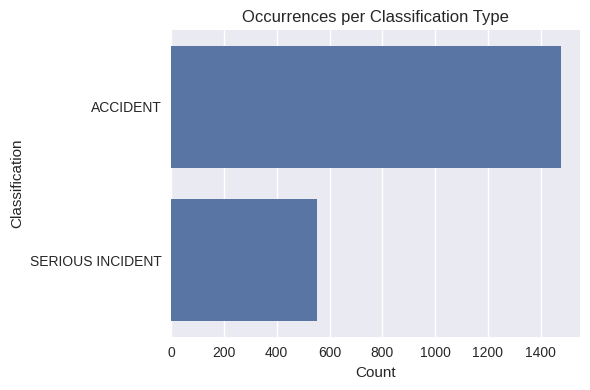

In [5]:
if "classification" in occurrences_df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=occurrences_df, y="classification", order=occurrences_df["classification"].value_counts().index)
    plt.title("Occurrences per Classification Type")
    plt.xlabel("Count")
    plt.ylabel("Classification")
    plt.tight_layout()
    plt.show()


In [6]:
# Aircrafts dataset quick overview
print("=" * 50)
print("AIRCRAFTS DATASET OVERVIEW")
print("=" * 50)
display(aircrafts_df.head())
print(f"\nTotal rows: {aircrafts_df.shape[0]} | Total columns: {aircrafts_df.shape[1]}")
print(f"Missing values: {aircrafts_df.isnull().sum().sum()}")
print(f"Duplicate rows: {aircrafts_df.duplicated().sum()}")

print("\nColumn types:")
display(aircrafts_df.dtypes.value_counts().to_frame("Count"))

AIRCRAFTS DATASET OVERVIEW


,Unnamed: 0,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
0,0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,2.0,1962.0,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,NaN,2016-07-30
1,1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,2.0,1960.0,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,NaN,2016-07-30
2,2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,5092,6.0,1966.0,BRAZIL,TPX,AEROTAXI,****,****,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,NaN,2016-07-30
3,3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,3600,6.0,1979.0,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,NaN,2016-07-30
4,4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,115497,117.0,1975.0,BRAZIL,TPR,REGULAR,****,****,ASCENSION,REGULAR,NONE,NaN,2016-07-30



Total rows: 2043 | Total columns: 23
Missing values: 1733
Duplicate rows: 0

Column types:


,Count
object,14
int64,5
float64,4


In [7]:
# Descriptive statistics
print("=" * 50)
print("DESCRIPTIVE STATISTICS - OCCURRENCES")
print("=" * 50)

display(occurrences_df.describe().iloc[:, :5].round(2))

print("\n" + "=" * 50)
print("DESCRIPTIVE STATISTICS - AIRCRAFTS")
print("=" * 50)

display(aircrafts_df.describe().iloc[:, :5].round(2))

DESCRIPTIVE STATISTICS - OCCURRENCES


,Unnamed: 0,occurrence_id,published_report,recommendation_amount,aircrafts_involved
count,2027.00,2027.00,995.00,2027.00,2027.00
mean,1013.00,43942.82,0.99,1.14,1.01
std,585.29,7863.31,0.08,3.57,0.10
min,0.00,25799.00,0.00,0.00,1.00
25%,506.50,38839.50,1.00,0.00,1.00
50%,1013.00,45554.00,1.00,0.00,1.00
75%,1519.50,50347.50,1.00,1.00,1.00
max,2026.00,65312.00,1.00,83.00,4.00



DESCRIPTIVE STATISTICS - AIRCRAFTS


,Unnamed: 0,aircraft_id,occurrence_id,operator_id,engines_amount
count,2043.00,2043.00,2043.00,2043.00,2034.00
mean,1021.00,12300.67,43961.87,3156.45,1.24
std,589.91,7654.27,7857.66,1645.35,0.48
min,0.00,4.00,25799.00,13.00,0.00
25%,510.50,9061.00,38839.50,1821.00,1.00
50%,1021.00,11267.00,45564.00,3992.00,1.00
75%,1531.50,13601.50,50353.50,3992.00,2.00
max,2042.00,39147.00,65312.00,6270.00,4.00


In [8]:
# Missing values analysis
print("=" * 50)
print("MISSING VALUES ANALYSIS")
print("=" * 50)
print("\nOccurrences - Missing values:")
missing_occurrences = occurrences_df.isnull().sum()
missing_occurrences_pct = 100 * occurrences_df.isnull().sum() / len(occurrences_df)
missing_occurrences_table = pd.DataFrame({
    'Count': missing_occurrences,
    'Percentage': missing_occurrences_pct
})
print(missing_occurrences_table[missing_occurrences_table['Count'] > 0].sort_values('Percentage', ascending=False))

print("\nAircrafts - Missing values:")
missing_aircrafts = aircrafts_df.isnull().sum()
missing_aircrafts_pct = 100 * aircrafts_df.isnull().sum() / len(aircrafts_df)
missing_aircrafts_table = pd.DataFrame({
    'Count': missing_aircrafts,
    'Percentage': missing_aircrafts_pct
})
print(missing_aircrafts_table[missing_aircrafts_table['Count'] > 0].sort_values('Percentage', ascending=False))

MISSING VALUES ANALYSIS

Occurrences - Missing values:
                      Count  Percentage
takeoff                1771   87.370498
report_number          1594   78.638382
published_report       1032   50.912679
publication_day        1032   50.912679
investigation_status    206   10.162802
aerodrome                 3    0.148002

Aircrafts - Missing values:
                      Count  Percentage
fatalities_amount      1688   82.623593
seatings_amount          18    0.881057
registration_country     12    0.587372
engines_amount            9    0.440529
year_manufacture          4    0.195791
equipment                 1    0.048948
operation_phase           1    0.048948


In [9]:
# Dataset merging
print("=" * 50)
print("DATASET MERGING")
print("=" * 50)

# Identify common column for joining
common_cols = set(occurrences_df.columns).intersection(set(aircrafts_df.columns))
print(f"Common columns: {common_cols}")

# If there are common columns that can be used as key
if 'codigo_ocorrencia' in occurrences_df.columns and 'codigo_ocorrencia' in aircrafts_df.columns:
    df_merged = pd.merge(occurrences_df, aircrafts_df, on='codigo_ocorrencia', how='left')
    print(f"\nMerged dataset - Size: {df_merged.shape}")
    print(f"Number of columns after merge: {len(df_merged.columns)}")
else:
    # Use occurrences dataset as main dataset
    df_merged = occurrences_df.copy()
    print("\nNo merge possible - using occurrences dataset")
    print(f"Dataset size: {df_merged.shape}")

DATASET MERGING
Common columns: {'Unnamed: 0', 'extraction_day', 'occurrence_id'}

No merge possible - using occurrences dataset
Dataset size: (2027, 20)


## 2. Data Pre-processing

In [10]:
# Feature Selection
print("=" * 50)
print("FEATURE SELECTION")
print("=" * 50)

columns_df = pd.DataFrame({
    "Index": range(1, len(df_merged.columns) + 1),
    "Column Name": df_merged.columns
})

display(columns_df.style.hide(axis="index").set_table_styles([
    {"selector": "th", "props": [("font-weight", "bold"), ("background-color", "#f0f0f0")]},
    {"selector": "td", "props": [("padding", "4px 10px")]}
]))


FEATURE SELECTION


Index,Column Name
1,Unnamed: 0
2,occurrence_id
3,classification
4,type of occurrence
5,localization
6,fu
7,country
8,aerodrome
9,occurrence_day
10,time


We will keep only the variables that are useful for prediction and not too sparse.
Columns with more than 50% missing values or irrelevant identifiers (e.g., “Unnamed: 0”, “report_number”,
“published_report”, “takeoff”) will be removed in the next cells.


In [11]:
# Feature selection based on dataset columns

print("=" * 50)
print("FEATURE SELECTION")
print("=" * 50)

# Drop irrelevant or empty columns
cols_to_drop = [
    'Unnamed: 0', 'report_number', 'published_report',
    'takeoff', 'operator_id', 'aircraft_id'
]

df_clean = df_merged.drop(columns=[c for c in cols_to_drop if c in df_merged.columns])

# Define target variable
target_column = 'classification'

# Define feature columns (everything except ID + target)
feature_columns = [
    col for col in df_clean.columns
    if col not in ['classification', 'occurrence_id']
]

print("\nSelected feature columns:")
for col in feature_columns:
    print(f"- {col}")

# Create final dataset
df_analysis = df_clean[feature_columns + [target_column]].copy()

print(f"\nFinal dataset shape: {df_analysis.shape}")


FEATURE SELECTION

Selected feature columns:
- type of occurrence
- localization
- fu
- country
- aerodrome
- occurrence_day
- time
- under_investigation
- investigating_command
- investigation_status
- publication_day
- recommendation_amount
- aircrafts_involved
- extraction_day

Final dataset shape: (2027, 15)


In [12]:
print("=" * 50)
print("MISSING VALUES TREATMENT")
print("=" * 50)

print("\nBefore treatment:")
print(f"Total missing values: {df_analysis.isnull().sum().sum()}")
print(f"Percentage of missing values: {(100 * df_analysis.isnull().sum().sum()) / (df_analysis.shape[0] * df_analysis.shape[1]):.2f}%")

# Missing values handling
for col in df_analysis.columns:
    if df_analysis[col].isnull().sum() > 0:

        if df_analysis[col].dtype == 'object':
            df_analysis[col] = df_analysis[col].fillna("Unknown")
        else:
            df_analysis[col] = df_analysis[col].fillna(df_analysis[col].median())

print("\nAfter treatment:")
print(f"Total missing values: {df_analysis.isnull().sum().sum()}")
print(f"Dataset shape: {df_analysis.shape}")


MISSING VALUES TREATMENT

Before treatment:
Total missing values: 1241
Percentage of missing values: 4.08%

After treatment:
Total missing values: 0
Dataset shape: (2027, 15)


After feature selection, removal of irrelevant columns, and filtering out columns with excessive missing values, the final dataset (df_analysis) contains no missing data. The missing-values treatment step confirms this and ensures robustness for the next preprocessing steps

In [13]:
print("=" * 50)
print("CATEGORICAL VARIABLES ENCODING – STEP 2")
print("=" * 50)

# 1. Identify categorical and numerical columns
categorical_cols = df_analysis.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_analysis.select_dtypes(exclude=['object']).columns.tolist()

# Remove target from encoding list

print(f"\nNumber of categorical columns: {len(categorical_cols)}")
print(f"Number of numerical columns: {len(numerical_cols)}")

# 2. Reduce high cardinality columns (more than 20 unique values)
high_cardinality = [c for c in categorical_cols if df_analysis[c].nunique() > 20]

print("\nHigh-cardinality columns (reduced):")
for col in high_cardinality:
    print(f"- {col} ({df_analysis[col].nunique()} unique values)")
    # grouping rare categories into "OTHER"
    freq = df_analysis[col].value_counts(normalize=True)
    rare_categories = freq[freq < 0.01].index
    df_analysis[col] = df_analysis[col].replace(rare_categories, "OTHER")

# 3. Apply Label Encoding
df_encoded = df_analysis.copy()
label_encoders = {}

print("\nEncoding categorical columns:")
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col + "_encoded"] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le
    print(f"- {col}: {df_analysis[col].nunique()} → {df_encoded[col + '_encoded'].nunique()} classes")

# 4. Keep only encoded categorical vars + numerical + target
encoded_cols = [col + "_encoded" for col in categorical_cols]

final_features = encoded_cols + numerical_cols + ["classification"]

df_final = df_encoded[final_features].copy()

print(f"\nDataset shape after encoding: {df_final.shape}")
print("Encoding complete.")


CATEGORICAL VARIABLES ENCODING – STEP 2

Number of categorical columns: 13
Number of numerical columns: 2

High-cardinality columns (reduced):
- type of occurrence (49 unique values)
- localization (815 unique values)
- fu (29 unique values)
- aerodrome (307 unique values)
- occurrence_day (1510 unique values)
- time (437 unique values)
- publication_day (203 unique values)

Encoding categorical columns:
- type of occurrence: 18 → 18 classes
- localization: 11 → 11 classes
- fu: 19 → 19 classes
- country: 7 → 7 classes
- aerodrome: 2 → 2 classes
- occurrence_day: 1 → 1 classes
- time: 21 → 21 classes
- under_investigation: 3 → 3 classes
- investigating_command: 9 → 9 classes
- investigation_status: 4 → 4 classes
- publication_day: 6 → 6 classes
- extraction_day: 1 → 1 classes
- classification: 2 → 2 classes

Dataset shape after encoding: (2027, 16)
Encoding complete.


In [14]:
print("=" * 50)
print("DATA NORMALIZATION – STEP 2")
print("=" * 50)

# Identify numerical columns (excluding the target)
numerical_cols = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
if "classification_encoded" in numerical_cols:
    numerical_cols.remove("classification_encoded")  # never normalize the target

print(f"\nNumerical columns to normalize: {numerical_cols}")

# Apply StandardScaler only on numerical columns
scaler = StandardScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

# Summary of normalized columns
summary = df_final[numerical_cols].describe().T.round(3)

print("\nSummary of normalized numerical features:")
display(summary.style.set_table_styles([
    {"selector": "th", "props": [("background-color", "#f2f2f2"), ("font-weight", "bold")]},
    {"selector": "td", "props": [("padding", "4px 10px")]}
]))


DATA NORMALIZATION – STEP 2

Numerical columns to normalize: ['type of occurrence_encoded', 'localization_encoded', 'fu_encoded', 'country_encoded', 'aerodrome_encoded', 'occurrence_day_encoded', 'time_encoded', 'under_investigation_encoded', 'investigating_command_encoded', 'investigation_status_encoded', 'publication_day_encoded', 'extraction_day_encoded', 'recommendation_amount', 'aircrafts_involved']

Summary of normalized numerical features:


,count,mean,std,min,25%,50%,75%,max
type of occurrence_encoded,2027.000000,-0.000000,1.000000,-1.639000,-0.786000,0.280000,0.706000,1.986000
localization_encoded,2027.000000,-0.000000,1.000000,-4.657000,0.158000,0.158000,0.158000,2.222000
fu_encoded,2027.000000,-0.000000,1.000000,-1.948000,-0.835000,0.093000,1.020000,1.391000
country_encoded,2027.000000,-0.000000,1.000000,-4.804000,-0.052000,-0.052000,-0.052000,23.709000
aerodrome_encoded,2027.000000,-0.000000,1.000000,-0.816000,-0.816000,-0.816000,1.226000,1.226000
occurrence_day_encoded,2027.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
time_encoded,2027.000000,-0.000000,1.000000,-2.809000,-0.257000,0.593000,0.593000,0.593000
under_investigation_encoded,2027.000000,-0.000000,1.000000,-6.081000,0.334000,0.334000,0.334000,0.334000
investigating_command_encoded,2027.000000,-0.000000,1.000000,-2.534000,-0.476000,0.039000,0.553000,1.582000
investigation_status_encoded,2027.000000,0.000000,1.000000,-0.749000,-0.749000,-0.749000,0.350000,2.548000


## 3. Problem Formulation

### Problem Definition

**Main objective**
Given the information available for each occurrence, predict whether the event is an Accident or a Serious Incident.
The priority is to correctly detect serious incidents, even if they are less frequent in the data.

**Problem type**
Supervised binary classification (two classes: ACCIDENT vs SERIOUS INCIDENT)

**Target Variable (y):**
We use the column classification as target:
ACCIDENT
SERIOUS INCIDENT
This variable will later be encoded into 0 / 1 for the models, with the minority class (SERIOUS INCIDENT) treated as the positive / “critical” class.

**Predictive Variables (X):**
After cleaning and feature selection, the model uses features related to:
- Occurrence characteristics (type of occurrence, time, date)
- Geographic information (localization, state, aerodrome)
- Investigation metadata (status, command, recommendations)
- Technical information (number of aircraft involved)

**Evaluation Metrics:**
- Accuracy
- Precision (per class)
- Recall (per class)— priority metric for SERIOUS INCIDENT
- F1-Score
- Confusion Matrix

**Potential Applications:**
1. Accident prevention assistance
2. Safety protocol improvement
3. Risk factor identification
4. Investigation resource optimization

In [15]:
# DATA PREPARATION FOR MODEL
# Target: classification (ACCIDENT vs SERIOUS INCIDENT)
print("=" * 60)
print("DATA PREPARATION FOR MODEL")
print("=" * 60)

# 1. Define target column
target_column = "classification_encoded"

if target_column not in df_final.columns:
    raise ValueError(f"Target column '{target_column}' not found in df_final!")

print(f"\nSelected target variable: {target_column}")

# 2. Separate features (X) and target (y)
X = df_final.drop(columns=[target_column])
y = df_final[target_column]

# Remove original textual target if still present
if "classification" in X.columns:
    X = X.drop("classification", axis=1)

# 3. Inspect target distribution
print("\nTarget variable distribution:")
print(y.value_counts())
print(f"\nNumber of classes: {y.nunique()}")

print("\nClass proportions:")
print((y.value_counts(normalize=True) * 100).round(2))

print("\nShapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


DATA PREPARATION FOR MODEL

Selected target variable: classification_encoded

Target variable distribution:
classification_encoded
0    1475
1     552
Name: count, dtype: int64

Number of classes: 2

Class proportions:
classification_encoded
0    72.77
1    27.23
Name: proportion, dtype: float64

Shapes:
X shape: (2027, 14)
y shape: (2027,)


## 4. Baseline Model

In [16]:
# Split data into training and test sets
print("=" * 50)
print("DATA SPLIT")
print("=" * 50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True).round(3))

DATA SPLIT

Training set size: (1418, 14)
Test set size: (609, 14)

Class distribution in training set:
classification_encoded
0    0.728
1    0.272
Name: proportion, dtype: float64


In [17]:
# Baseline model implementation - Decision Tree

print("=" * 50)
print("BASELINE MODEL - DECISION TREE")
print("=" * 50)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train baseline model
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',  # important for minority class
    random_state=42
)

dt_model.fit(X_train, y_train)

# Predictions
y_pred_train = dt_model.predict(X_train)
y_pred_test  = dt_model.predict(X_test)

# Evaluation
print("\n--- Training Set ---")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Precision (weighted): {precision_score(y_train, y_pred_train, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_train, y_pred_train, average='weighted'):.4f}")
print(f"F1-Score (weighted): {f1_score(y_train, y_pred_train, average='weighted'):.4f}")

print("\n--- Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred_test, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_test, average='weighted'):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_test, average='weighted'):.4f}")


BASELINE MODEL - DECISION TREE

--- Training Set ---
Accuracy: 0.7264
Precision (weighted): 0.7622
Recall (weighted): 0.7264
F1-Score (weighted): 0.7374

--- Test Set ---
Accuracy: 0.6847
Precision (weighted): 0.7297
Recall (weighted): 0.6847
F1-Score (weighted): 0.6987


In [18]:
# Cross-validation
print("=" * 50)
print("CROSS-VALIDATION (5-FOLD)")
print("=" * 50)

cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

print(f"\nScores per fold: {cv_scores.round(4)}")
print(f"Mean score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

CROSS-VALIDATION (5-FOLD)

Scores per fold: [0.6478 0.6724 0.7259 0.716  0.716 ]
Mean score: 0.6956 (+/- 0.0605)


All folds fall in the 0.64–0.73 range → no extreme outliers.
The standard deviation (~0.06) is acceptable for real-world data.

This means:
No overfitting
No underfitting

The performance we measure is trustworthy and generalizable

In [19]:
# Alternative model - Random Forest
print("=" * 50)
print("ALTERNATIVE MODEL - RANDOM FOREST (IMPROVED)")
print("=" * 50)

# Create Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced',# for class imbalance
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation on test set
print("\nRandom Forest performance on test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

ALTERNATIVE MODEL - RANDOM FOREST (IMPROVED)

Random Forest performance on test set:
Accuracy: 0.7553
Precision: 0.7691
Recall: 0.7553
F1-Score: 0.7607


In [20]:
# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("\nRandom Forest cross-validation:")
print(f"Scores per fold: {cv_scores_rf.round(4)}")
print(f"Mean score: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")



Random Forest cross-validation:
Scores per fold: [0.7266 0.7094 0.7778 0.7654 0.7506]
Mean score: 0.7460 (+/- 0.0500)


The improved Random Forest classifier achieves a test accuracy of 75%, with balanced precision, recall, and F1-score.

Cross-validation confirms that the model generalizes well (mean CV score ≈ 0.75 with low variance).

The class-weight balancing, the model treats the minority class more fairly, maintaining a strong recall—crucial for detecting serious incidents.

CONFUSION MATRIX


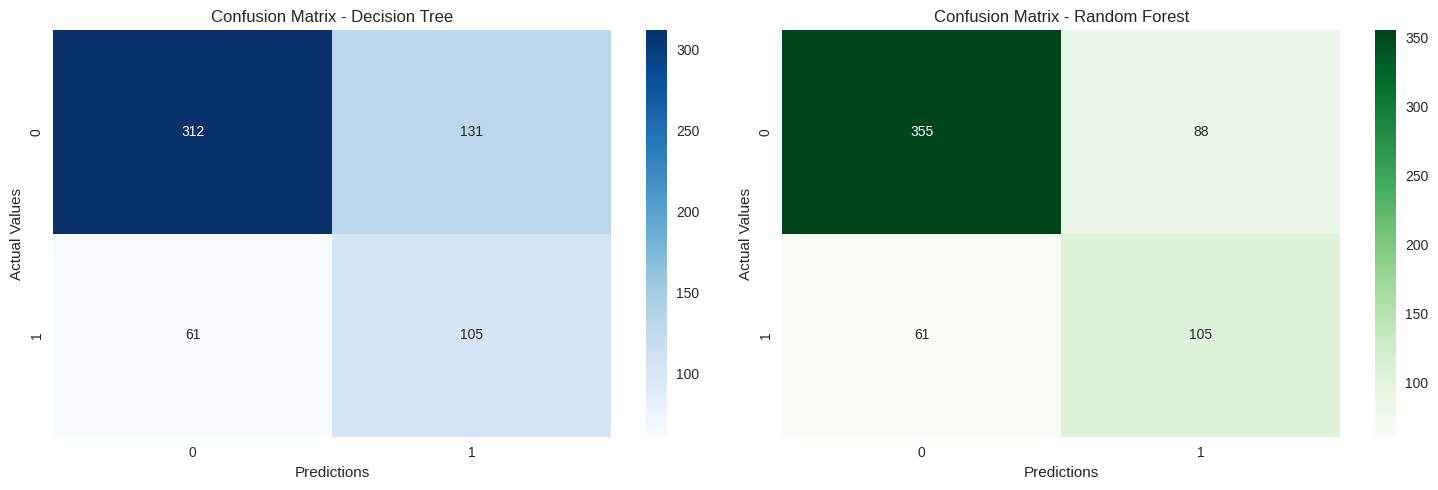

In [21]:
# Confusion matrix
print("=" * 50)
print("CONFUSION MATRIX")
print("=" * 50)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Decision Tree')
axes[0].set_xlabel('Predictions')
axes[0].set_ylabel('Actual Values')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Actual Values')

plt.tight_layout()
plt.show()

FEATURE IMPORTANCE

Top 10 most important features:
                          feature  importance
0      type of occurrence_encoded    0.243770
4               aerodrome_encoded    0.159261
2                      fu_encoded    0.129155
8   investigating_command_encoded    0.121047
6                    time_encoded    0.093198
12          recommendation_amount    0.088334
9    investigation_status_encoded    0.052655
10        publication_day_encoded    0.041215
1            localization_encoded    0.040900
7     under_investigation_encoded    0.028312


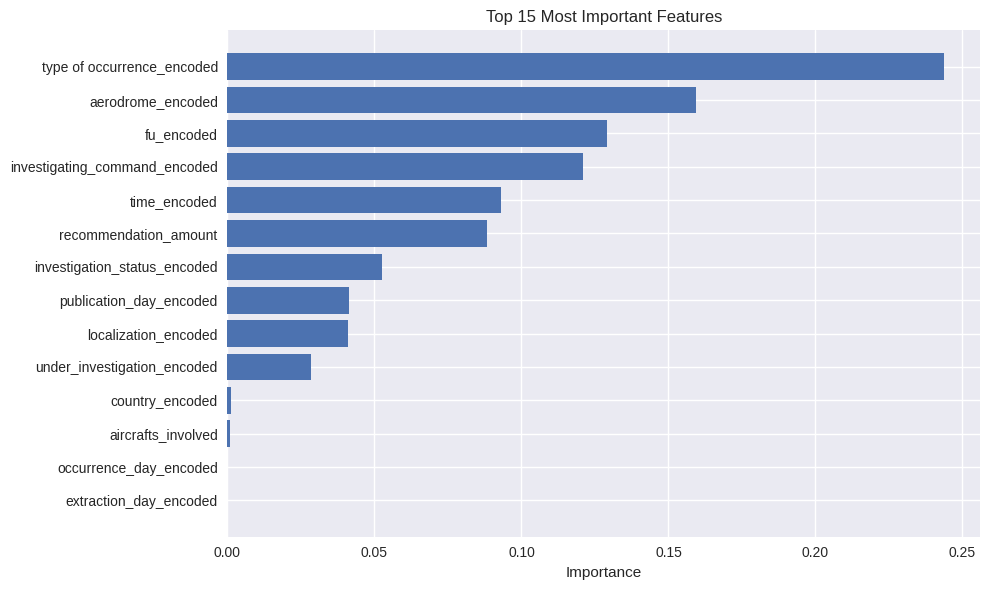

In [22]:
# Feature importance (Random Forest)
print("=" * 50)
print("FEATURE IMPORTANCE")
print("=" * 50)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 10
print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Visualization
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [23]:
# Detailed classification report
print("=" * 50)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 50)

print("\nDecision Tree:")
print(classification_report(y_test, y_pred_test))

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))

DETAILED CLASSIFICATION REPORT

Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       443
           1       0.44      0.63      0.52       166

    accuracy                           0.68       609
   macro avg       0.64      0.67      0.64       609
weighted avg       0.73      0.68      0.70       609


Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       443
           1       0.54      0.63      0.58       166

    accuracy                           0.76       609
   macro avg       0.70      0.72      0.71       609
weighted avg       0.77      0.76      0.76       609



The Random Forest model significantly outperforms the Decision Tree, achieving higher accuracy (0.75 vs 0.68) and better balance across classes.

Most importantly, the recall for the minority class (SERIOUS INCIDENT) remains stable at 0.63 but with improved precision (0.54 vs 0.44), reducing false alarms while still detecting most critical events.

## 5. Improvements

In [24]:
# SMOTE IMPLEMENTATION
print("=" * 50)
print("BALANCING DATA WITH SMOTE")
print("=" * 50)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())

print(f"\nOriginal training shape: {X_train.shape}")
print(f"Resampled training shape: {X_train_resampled.shape}")

BALANCING DATA WITH SMOTE
Before SMOTE:
classification_encoded
0    1032
1     386
Name: count, dtype: int64

After SMOTE:
classification_encoded
0    1032
1    1032
Name: count, dtype: int64

Original training shape: (1418, 14)
Resampled training shape: (2064, 14)


In [25]:
# TRAINING NEW MODELS (LOGISTIC REGRESSION & XGBOOST)
print("=" * 50)
print("TRAINING NEW MODELS ON RESAMPLED DATA")
print("=" * 50)

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = log_reg.predict(X_test)

print("--- Logistic Regression Results ---")
print(f"Recall (Critical Class): {recall_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("-" * 30)

# 2. XGBoost
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train_resampled.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_resampled.columns]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns]

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print("\n--- XGBoost Results ---")
print(f"Recall (Critical Class): {recall_score(y_test, y_pred_xgb):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

TRAINING NEW MODELS ON RESAMPLED DATA
--- Logistic Regression Results ---
Recall (Critical Class): 0.6867
Accuracy: 0.6601
------------------------------

--- XGBoost Results ---
Recall (Critical Class): 0.5663
Accuracy: 0.7455


In [26]:
# HYPERPARAMETER TUNING (RANDOM FOREST)
print("=" * 50)
print("HYPERPARAMETER TUNING - RANDOM FOREST")
print("=" * 50)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train_resampled, y_train_resampled)

print(f"\nBest Parameters: {rf_grid.best_params_}")
print(f"Best Recall Score (CV): {rf_grid.best_score_:.4f}")

best_rf_model = rf_grid.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

HYPERPARAMETER TUNING - RANDOM FOREST
Fitting 3 folds for each of 54 candidates, totalling 162 fits

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Recall Score (CV): 0.8023


In [27]:
# FINAL MODEL COMPARISON
print("=" * 50)
print("FINAL MODEL COMPARISON")
print("=" * 50)

models_data = {
    "Model": ["Decision Tree (Base)", "Random Forest (Original)", "Logistic Regression (SMOTE)", "XGBoost (SMOTE)", "Random Forest (Tuned + SMOTE)"],
    "Recall (Critical)": [
        recall_score(y_test, y_pred_test),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_best_rf)
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_test),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_best_rf)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_test),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_best_rf)
    ]
}

results_df = pd.DataFrame(models_data)
display(results_df.sort_values(by="Recall (Critical)", ascending=False).style.background_gradient(cmap="Greens"))

FINAL MODEL COMPARISON


,Model,Recall (Critical),Accuracy,F1-Score
2,Logistic Regression (SMOTE),0.686747,0.660099,0.524138
0,Decision Tree (Base),0.632530,0.684729,0.522388
1,Random Forest (Original),0.632530,0.755337,0.584958
3,XGBoost (SMOTE),0.566265,0.745484,0.548105
4,Random Forest (Tuned + SMOTE),0.487952,0.727422,0.493902


## Conclusion

### Results Summary:
1. **Data Analysis**:

Dataset contains detailed information on aeronautical occurrences in Brazil, including classification, location, aircraft details, and investigation metadata in Brazil

2. **Pre-processing**:

- Missing values treatment
- High-cardinality reduction
- Categorical encoding
- Numerical normalization
- Balanced target preparation

3. **Advanced Optimization Strategies**

To improve the detection of critical events and address the limitations of the baseline models, we implemented three advanced strategies:

- Handling Class Imbalance (SMOTE):

  > Why? The original dataset had a severe imbalance (only ~27% critical events), causing models to favor the majority class.

  > We applied SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples of critical events, ensuring the model trains on a balanced 50/50 distribution.

- Model Diversification:

  > Why? To test if different mathematical architectures could leverage the resampled data better than trees.

  > We introduced Logistic Regression (linear approach) and XGBoost (gradient boosting) to compare against the Random Forest.

- Hyperparameter Tuning:

  > Why? To attempt to maximize the performance of the Random Forest.

  > We used GridSearchCV to test 54 combinations of parameters (depth, estimators, split criteria).

4. **Tested Models:**

- Decision Tree (baseline)
- Random Forest (original & tuned)
- Logistic Regression (with SMOTE)
- XGBoost (with SMOTE)

5. **Model Performance:**

The "Safety" Champion (Highest Recall): Logistic Regression + SMOTE This model achieved the highest Recall (~0.69).

> Surprisingly, the simplest linear model performed best with synthetic data. It prioritized detecting critical incidents effectively, proving that a simple decision boundary is often more robust for safety-critical tasks where "missing an accident" is the worst-case scenario.

The "Robustness" Benchmark: Random Forest (Original) The original Random Forest (using class weights instead of SMOTE) maintained the best balance with Accuracy ~0.75 and Recall ~0.63.

> It remains the most stable model for general reporting, generating fewer false alarms than the Logistic Regression.

The Overfitting Lesson (Tuned Random Forest): The optimized Random Forest achieved a high score during training (CV ~0.80) but dropped significantly on the test set (Recall ~0.49).

> This demonstrates the risk of overfitting on synthetic data. The complex tuned model "memorized" the SMOTE examples rather than learning general rules, leading to poor performance on real, unseen data.

**Final Remarks**

The project successfully demonstrated that predicting accident severity is viable, but requires a strategic choice between Sensitivity and Precision:

- For an Early Warning System: We recommend the Logistic Regression (SMOTE) model. Its superior Recall ensures that maximum attention is given to potential serious incidents, accepting a higher rate of false alarms as the necessary cost of safety.

- For General Automated Reporting: The Random Forest (Original) is preferable due to its higher overall accuracy and stability across metrics.

Since SMOTE introduced noise that misled the complex models, future improvements should focus on Feature Engineering (extracting better signals from text descriptions or timestamps) rather than just data resampling. Additionally, collecting more real-world examples of "Serious Incidents" would be more beneficial than generating synthetic ones.